In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
columns=["S.No","Product Title","Vendor ID","Cluster ID","Cluster Label","Category ID","Category Label "]
df=pd.read_csv("skroutz_aggregate.csv", names=columns)

In [3]:
df.head()

,S.No,Product Title,Vendor ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,amd ryzen 5 1600 box epexergastis me wraith sp...,1030,1,AMD Ryzen 5 1600 Box,696,CPUs
1,2,amd ryzen 5 1600,3964,1,AMD Ryzen 5 1600 Box,696,CPUs
2,3,amd ryzen 5 1600 box pliromi ke se eos 36 dosis,4814,1,AMD Ryzen 5 1600 Box,696,CPUs
3,4,amd ryzen 5 1600 yd1600bbaebox,4835,1,AMD Ryzen 5 1600 Box,696,CPUs
4,5,amd ryzen 5 1600 box yd1600bbaebox,2976,1,AMD Ryzen 5 1600 Box,696,CPUs


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238170 entries, 0 to 238169
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   S.No             238170 non-null  int64 
 1   Product Title    238170 non-null  object
 2   Vendor ID        238170 non-null  int64 
 3   Cluster ID       238170 non-null  int64 
 4   Cluster Label    238170 non-null  object
 5   Category ID      238170 non-null  int64 
 6   Category Label   238170 non-null  object
dtypes: int64(4), object(3)
memory usage: 12.7+ MB


In [5]:
df.drop('S.No',axis=1, inplace=True)

In [6]:
data=df.groupby('Category ID',as_index=False)[['Cluster ID']].agg(np.sum)
data.head()

,Category ID,Cluster ID
0,354,5738092720
1,355,6943329103
2,696,149194
3,810,17817949
4,927,54768874


In [7]:
# split data into features (X) and labels (y)
X = df.iloc[:,[2]]
y = df.iloc[:,[4]]
print(X.sample(5))
print(y.sample(5))

        Cluster ID
80485        46158
212125       69988
30882         4208
16012         3295
33268         4384
        Category ID
233676         1695
187326          355
93611           354
95686           354
195853          354


In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,Cluster ID
1245,-1.995340
73130,-0.583384
8904,-1.904181
163703,0.913760
203806,1.199703


In [9]:
#def scale(x):
  #  return (x-np.mean(x))/np.std(x)
#data_num=data.drop("Cluster ID",axis=1)
#data_num

In [10]:
#data_scaled=data_num.apply(scale,axis=1)

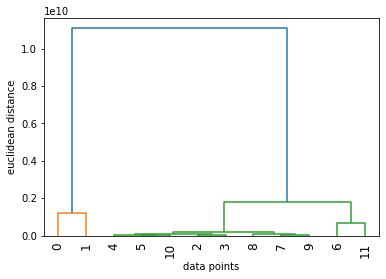

In [11]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(data, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()